IndexError: index 2 is out of bounds for axis 1 with size 2

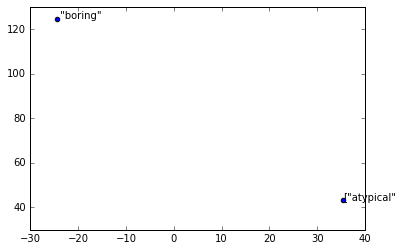

In [7]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline  

__author__ = 'amanda'

feature_array = pd.read_pickle('./clean_data/feature_array')

model = TSNE(n_components=2, random_state=0)
tsne_output = model.fit_transform(feature_array.T)

field_names = pd.read_csv('./clean_data/feature_field_list.txt')

fig, ax = plt.subplots()
ax.scatter( tsne_output[:, 0],  tsne_output[:, 1])


for i, txt in enumerate(field_names):
    ax.annotate(txt, (tsne_output[i, 0], tsne_output[i, 1]))

In [8]:
tsne_output.shape

(40, 2)

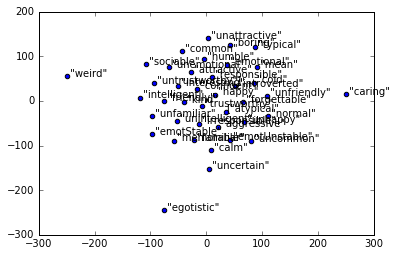

In [9]:
field_names = pd.read_csv('./clean_data/feature_field_list.txt')

fig, ax = plt.subplots()
ax.scatter( tsne_output[:, 0],  tsne_output[:, 1])


for i, txt in enumerate(field_names):
    ax.annotate(txt, (tsne_output[i, 0], tsne_output[i, 1]))

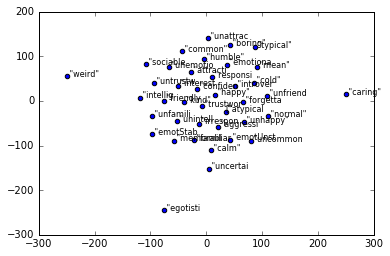

In [14]:
fig, ax = plt.subplots()
ax.scatter( tsne_output[:, 0],  tsne_output[:, 1])


for i, txt in enumerate(field_names):
    ax.annotate(txt[:10], (tsne_output[i, 0], tsne_output[i, 1]), fontsize=8)

In [1]:
import numpy as np
from bokeh.palettes import RdYlBu3
from bokeh.plotting import figure, curdoc
N = 50
p = figure(x_range=(0, 100), y_range=(0, 100), toolbar_location=None)

p.border_fill_color = 'black'
p.background_fill_color = 'black'
p.outline_line_color = None
p.grid.grid_line_color = None

p.rect(x=50, y=50, width=80, height=80,
       line_alpha=0.5, line_color="darkgrey", fill_color=None)

r = p.text(x=[], y=[], text=[], text_color=[],
           text_font_size="20pt", text_baseline="middle", text_align="center")

def make_callback(i):
    ds = r.data_source

    def func():
        if i == N-1:
            ds.data['x'].append(50)
            ds.data['y'].append(95)
            ds.data['text'].append("DONE")
            ds.data['text_color'].append("white")
        else:
            ds.data['x'].append(np.random.random()*70 + 15)
            ds.data['y'].append(np.random.random()*70 + 15)
            ds.data['text_color'].append(RdYlBu3[i%3])
            ds.data['text'].append(str(i))
        ds.trigger('data', ds.data, ds.data)
    func.interval = i * 100

    return func

callbacks = [make_callback(i) for i in range(N)]

for callback in callbacks:
    curdoc().add_timeout_callback(callback, callback.interval)